## Using tensorflow to classifying images

In [1]:
from tensorflow.keras import models, datasets, layers

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

From the tensorflow datasets, we are going to import the cifar10 data, and split in two types.
The training data will be used to actually train the neural network, and the testing data will be used to evaluate the model's accuracy.

In [3]:
(training_data, training_labels), (testing_data, testing_labels) = datasets.cifar10.load_data()

The image data that comes from the cifar10 data is based in a 0-255 point scaling. Instead of doing like this, we're going to normalize the data in order to make the images matrix values in a range of 0-1.


In [4]:
training_data = training_data/255

In [5]:
testing_data = testing_data/255

All images that exist in the cifar10 dataset have a class. The images can be classified as cars, deers, airplanes, and more. The only problem here is the fact the class label in the dataset is not saved by it's name - they're categorized by number indexes. We will now create a list with the class labels ordered by the index of cifar10 dataset. 

In [6]:
class_label_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Sheep', 'Truck']

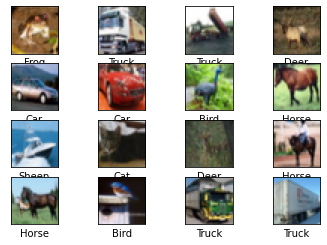

In [7]:
%matplotlib inline
for i in range(16): # Here i am creating a plot of 16 images in the dataset
    plt.subplot(4, 4, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(training_data[i])
    plt.xlabel(class_label_names[training_labels[i][0]]) #For each image, it's class label will be placed above

plt.show()

## Note!

It is important to note here that the images in the cifar10 dataset are compressed, and extremely reduced in size. They are 32x32 in pixels, which make them pretty suscetible to fail in classifying bloatful images.
As this project is being made to test the tensorflow features, I personelly don't care about those specifications, since I am not planning to deploy this project.

Now we're going to reduce the ammount of images for testing and training, since the dataset is enormous, and I have a normal computer, without a GPU to change to.

In [8]:
#I'm using a slice here to get only the first 20000 images from the cifar10 dataset
training_data = training_data[:20000]
training_labels = training_labels[:20000]

In [9]:
#Here too, reducing to 4000 images
testing_data = testing_data[:4000]
testing_labels = testing_labels[:4000]

More then this could be good in a supercomputer. But on my computer, you know, I don't think is possible.

In [10]:
model = models.Sequential() # creating the model, the neural network will be an Convolutional one

In [11]:
# the first layer will be a 2D layer.
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)))

In [12]:
model.add(layers.MaxPooling2D(2, 2)) #currently studying what is this layer, to be sincere

In [13]:
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #another 2D layer

In [14]:
model.add(layers.MaxPooling2D(2, 2)) # then another pooling layer

In [15]:
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # then another 2D layer

In [16]:
model.add(layers.Flatten()) # now setting the data to be unidimensional

In [17]:
model.add(layers.Dense(64, activation='relu')) # adding a dense layer 

In [18]:
model.add(layers.Dense(10, activation='softmax')) # and by the end, a dense layer for softmax, to output

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

The model is now defined and modelled, so we need to fit it.

In [20]:
model.fit(training_data, training_labels, epochs=10, validation_data=(testing_data, testing_labels))

Epoch 1/10
625/625 [==============================] - 10s 15ms/step - loss: 1.7165 - accuracy: 0.3589 - val_loss: 1.4785 - val_accuracy: 0.4540
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 1.3625 - accuracy: 0.5093 - val_loss: 1.2920 - val_accuracy: 0.5347
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 1.1841 - accuracy: 0.5846 - val_loss: 1.1946 - val_accuracy: 0.5683
Epoch 4/10
625/625 [==============================] - 10s 15ms/step - loss: 1.0727 - accuracy: 0.6231 - val_loss: 1.0697 - val_accuracy: 0.6190
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.9794 - accuracy: 0.6552 - val_loss: 1.0424 - val_accuracy: 0.6255
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.8899 - accuracy: 0.6868 - val_loss: 1.0495 - val_accuracy: 0.6340
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.8200 - accuracy: 0.7104 - val_loss: 1.0552 - val_accuracy: 

Now, with the fittint step over, we can test the accurary of the model. 
First, we shall save the values of the loss and the percentage of the accuray.

In [25]:
loss, accuracy = model.evaluate(testing_data, testing_labels)

125/125 [==============================] - 1s 5ms/step - loss: 1.0129 - accuracy: 0.6587


In [26]:
print(f'Loss: {loss}\nAccuracy: {accuracy}')

Loss: 1.0129497051239014
Accuracy: 0.6587499976158142


And, for the sake of our time, we're going to save the model as a file, to use it's classification function without needing to fit it again.

In [24]:
model.save('image_classifier.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: image_classifier.model/assets


In [ ]:
#Now, if we want to load the model, just run this line:
#loadedModel = models.load_model('image_classifier.model') 

Now we are loading an image to test the classifier.

In [41]:
testing_image = cv.imread('plane.jpg')

# BIG NOTE

The testing image MUST BE a 32x32 pixel JPEG image.
Every other size will just not work due to our configuration in the models.

In [42]:
testing_image = cv.cvtColor(testing_image, cv.COLOR_BGR2RGB)

After reading the image using opencv, it has a different color notation. We must change it from BGR to RGB.

In [45]:
img = np.array([testing_image]) / 255
prediction = model.predict(img)
prediction = np.argmax(prediction)

The code up here is for transforming the cv image in a numpy array like, also dividing the content of each pixel by 255 to obtain a 0-1 floating point notation.

In [46]:
prediction_name = class_label_names[prediction]

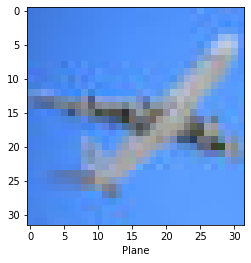

In [54]:
plt.imshow(testing_image)
plt.xlabel(prediction_name)
plt.show()

With some tricks in the matplotlib, ta-da! The image was classified as a Plane!


In [ ]:
#by Fábio Lira.